<a href="https://colab.research.google.com/github/tnwls6865/CAU_mAI/blob/main/Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Visualize Filters

생각보다 흥미롭지 않음. 해석하기 힘듬

Input 이미지와 직접적으로 연결되어 있지 않음

그러나 두번째 레이어는 첫번째 레이어와 연결되어 있기 때문에 첫번째 이후의 Activation 패턴을 알 수 있음.
 그러나 해석이 힘들기 때문에 다른 방법을 찾아야 합니다

높은 차원의 복잡한 데이터를 2차원에 차원 축소하는 방법입니다. 
낮은 차원 공간의 시각화에 주로 사용하며 차원 축소할 때는 비슷한 구조끼리 데이터를 정리한 상태이므로 데이터 구조를 이해하는 데 도움

매니폴드 학습의 하나로 복잡한 데이터의 시각화가 목적입니다. 높은 차원의 데이터를 2차원 또는 3차원으로 축소시켜 시각화 합니다.
높은 차원 공간에서 비슷한 데이터 구조는 낮은 차원 공간에서 가깝게 대응하며, 비슷하지 않은 데이터 구조는 멀리 떨어져 대응됩니다.

In [ ]:
data = load_digits()

In [ ]:
n_components = 2
model = TSNE(n_components=n_components)
X_embedded = model.fit_transform(data.data)
print(X_embedded[0])

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[47.030052 28.010656]


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


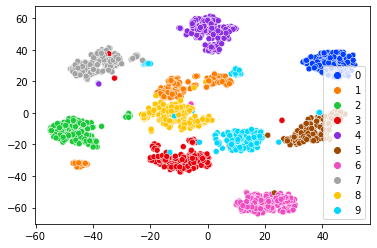

In [ ]:
palette = sns.color_palette("bright", 10)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=data.target, legend='full', palette=palette)
plt.show()

#### Saliency Maps
다른 영역에 비해서 픽셀값의 변화가 급격한 부분을 모아서 매핑한 후에 관심있는 물체를 관심이 없는 배경과 분리시키는 방법

즉, 모델이 분류하는데 있어서 중요하게 생각하는 부분의 픽셀을 강조

Saliency Map은 픽셀값의 변화가 급격한 부분을 모아서 매핑하는데, Gradient Descent를 사용하여서 변화가 큰 부분을 찾아냄

In [3]:
import cv2
image = cv2.imread('/content/drive/MyDrive/CAU_mAI/boat.jpg')

In [4]:
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
(success, saliencyMap) = saliency.computeSaliency(image)

In [5]:
saliencyMap = (saliencyMap * 255).astype("uint8")

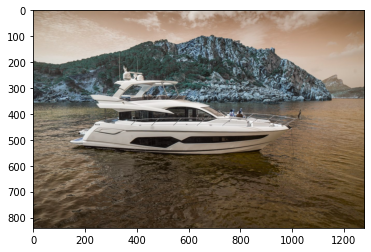

In [6]:
pl.imshow(image)

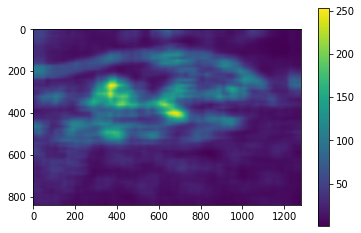

(<matplotlib.image.AxesImage at 0x7fad2626a520>,
 None)

In [9]:
pl.imshow(saliencyMap),pl.colorbar(),pl.show()

#### Deep Dream 
Rather than synthesizing an image to maximize a specific neuron, instead
try to amplify the neuron activations at some layer in the network

사실 얻을 수 있는 효과를 본다면, 정의보다는 제목이 더 와닿습니다. Deep Dream 은 기존 이미지에 학습된 패턴을 주입하여 과잉해석하도록 유도합니다. 과잉해석 이 핵심인데요. 신경망 이 Forward propagation(순전파) 한 다음, Activations(활성화값) 에 대해 최대화가 되도록 동작합니다. 일부 레이어의 Activations 로부터 Gradient(기울기) 를 계산하는 것이죠. 그리고 최대화를 통해 얻어진 과잉해석 은 이미지를 초현실주의적 표현 으로 바꿉니다. 몽화적이죠. LSD를 한 사람들처럼요

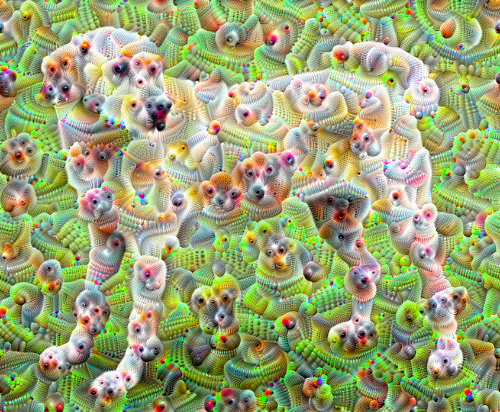


In [2]:
import argparse

parser = argparse.ArgumentParser()
parser.add_argument("--input_image", type=str, default='/content/drive/MyDrive/CAU_mAI/boat.jpg', help="path to input image")
parser.add_argument("--iterations", default=20, help="number of gradient ascent steps per octave")
parser.add_argument("--at_layer", default=27, type=int, help="layer at which we modify image to maximize outputs")
parser.add_argument("--lr", default=0.01, help="learning rate")
parser.add_argument("--octave_scale", default=1.4, help="image scale between octaves")
parser.add_argument("--num_octaves", default=10, help="number of octaves")
args = parser.parse_args(list())

In [29]:
import numpy as np
import torch
from torchvision import transforms

mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

preprocess = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean, std)])


def deprocess(image_np):
    image_np = image_np.squeeze().transpose(1, 2, 0)
    image_np = image_np * std.reshape((1, 1, 3)) + mean.reshape((1, 1, 3))
    image_np = np.clip(image_np, 0.0, 255.0)
    return image_np


def clip(image_tensor):
    for c in range(3):
        m, s = mean[c], std[c]
        image_tensor[0, c] = torch.clamp(image_tensor[0, c], -m / s, (1 - m) / s)
    return image_tensor

그러니까 입력과 커널의 합성곱 결과가 클수록 입력이 커널이 나타내는 특징을 강하게 가지고 있다고 해석을 할 수 있을겁니다.
그러니까 다시 현재 레이어 출력의 평균이라고 함은 입력이 커널들의 특징을 평균적으로 얼마나 강하게 가지고 있는가가 될겁니다.
그렇기 때문에 위에서 구한 기울기는 입력 이미지(dream)의 각 픽셀이 변화할 때 (커널들을 평균적으로 활성화 시키는) 이미지의 특징이 얼마나 강해지느냐를 뜻하는 값이 됩니다.
그렇다면 이 값을 기존 이미지에 더하는 것은 그런 특징들을 그대로 이미지에 추가하는 행동이 됨 
예를 들어 고양이에 활성화 되는 커널에 대해 위 방법으로 각 픽셀별 기울기를 구했다면 고양이와 관련된 픽셀이 더 큰 기울기 값을 가지고 있을 겁니다.
이 값을 그대로 해당 픽셀에 더하면 그 특징을 이미지에서 더 강조하는 행동이 될 것이죠.

In [30]:
def dream(image, model, iterations, lr):
    """ Updates the image to maximize outputs for n iterations """
    Tensor = torch.cuda.FloatTensor if torch.cuda.is_available else torch.FloatTensor
    image = Variable(Tensor(image), requires_grad=True)
    for i in range(iterations):
        model.zero_grad()
        out = model(image)
        loss = out.norm()
        loss.backward()
        avg_grad = np.abs(image.grad.data.cpu().numpy()).mean()
        norm_lr = lr / avg_grad
        image.data += norm_lr * image.grad.data
        image.data = clip(image.data)
        image.grad.data.zero_()
    return image.cpu().data.numpy()

In [31]:
image = preprocess(image).unsqueeze(0).cpu().data.numpy()

In [32]:
 
# Extract image representations for each octave
octave_scale=args.octave_scale
num_octaves=args.num_octaves

octaves = [image]
for _ in range(num_octaves - 1):
    octaves.append(nd.zoom(octaves[-1], (1, 1, 1 / octave_scale, 1 / octave_scale), order=1))

lr=args.lr
iterations=args.iterations

detail = np.zeros_like(octaves[-1])
for octave, octave_base in enumerate(tqdm.tqdm(octaves[::-1], desc="Dreaming")):
    if octave > 0:
        # Upsample detail to new octave dimension
        detail = nd.zoom(detail, np.array(octave_base.shape) / np.array(detail.shape), order=1)
    # Add deep dream detail from previous octave to new base
    input_image = octave_base + detail
    input_check = octave_base + detail
    # Get new deep dream image
    dreamed_image = dream(input_image, model, iterations, lr)
    # Extract deep dream details
    detail = dreamed_image - octave_base

Dreaming: 100%|██████████| 10/10 [00:18<00:00,  1.89s/it]


In [33]:
outputs = deprocess(dreamed_image)

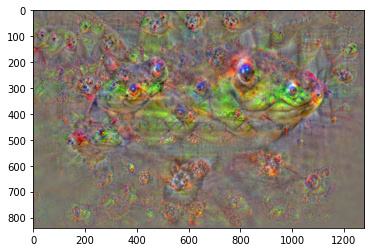

In [36]:
plt.imshow(deprocess(detail))

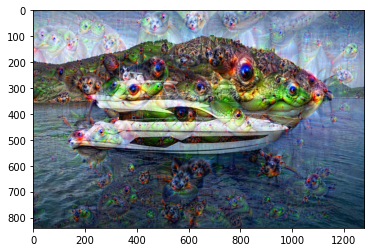

In [37]:
plt.imshow(outputs)

In [39]:
image2 = Image.open('/content/drive/MyDrive/CAU_mAI/cat.jpg')

In [40]:
image2 = preprocess(image2).unsqueeze(0).cpu().data.numpy()

In [41]:
# Extract image representations for each octave
octave_scale=args.octave_scale
num_octaves=args.num_octaves

octaves = [image2]
for _ in range(num_octaves - 1):
    octaves.append(nd.zoom(octaves[-1], (1, 1, 1 / octave_scale, 1 / octave_scale), order=1))

lr=args.lr
iterations=args.iterations

detail = np.zeros_like(octaves[-1])
for octave, octave_base in enumerate(tqdm.tqdm(octaves[::-1], desc="Dreaming")):
    if octave > 0:
        # Upsample detail to new octave dimension
        detail = nd.zoom(detail, np.array(octave_base.shape) / np.array(detail.shape), order=1)
    # Add deep dream detail from previous octave to new base
    input_image = octave_base + detail
    input_check = octave_base + detail
    # Get new deep dream image
    dreamed_image = dream(input_image, model, iterations, lr)
    # Extract deep dream details
    detail = dreamed_image - octave_base

Dreaming: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s]


In [42]:
outputs2 = deprocess(dreamed_image)

#### Style Transfer
미지를 새로운 예술적 스타일로 재현할 수 있습니다. 이 알고리즘은 입력 이미지, Content 이미지, Style 이미지 3개의 이미지를 가져와서 Content 이미지의 Content와 Style 이미지의 예술적 Style을 닮도록 입력을 변환합니다.

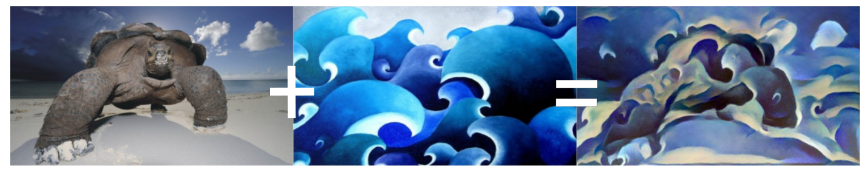

In [45]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
import torchvision.models as models

import copy

In [46]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [47]:
imsize = 512 if torch.cuda.is_available() else 128  

loader = transforms.Compose([
    transforms.Resize(imsize),  # 가져온 이미지 크기 조정
    transforms.ToTensor()])  # 텐서로 변환


def image_loader(image_name):
    image = Image.open(image_name)
    # 네트워크의 입력 차원에 맞추기 위해 필요한 가짜 배치 차원
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)


style_img = image_loader('/content/drive/MyDrive/CAU_mAI/picasso.jpg')
content_img = image_loader('/content/drive/MyDrive/CAU_mAI/dancing.jpg')

assert style_img.size() == content_img.size(), \
    "we need to import style and content images of the same size"

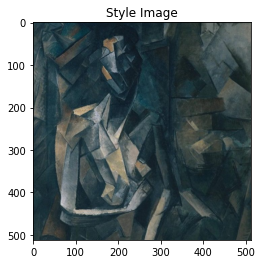

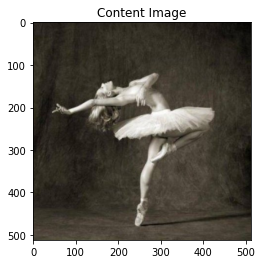

In [48]:
unloader = transforms.ToPILImage()  # PIL 이미지로 다시 변환

plt.ion()

def imshow(tensor, title=None):
    image = tensor.cpu().clone()  # 텐서를 복제하여 변경하지 않음
    image = image.squeeze(0)      # 가짜 배치 차원 제거
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) # plots가 업데이트 되도록 잠시 멈춤


plt.figure()
imshow(style_img, title='Style Image')

plt.figure()
imshow(content_img, title='Content Image')

In [49]:
class ContentLoss(nn.Module):

    def __init__(self, target,):
        super(ContentLoss, self).__init__()
        self.target = target.detach()

    def forward(self, input):
        self.loss = F.mse_loss(input, self.target)
        return input

In [52]:
def gram_matrix(input):
    a, b, c, d = input.size()  # a=배치 크기(=1)
    # b=특징 맵의 수
    # (c,d)=특징 맵의 차원 (N=c*d)

    features = input.view(a * b, c * d)  # F_XL을 \hat F_XL로 크기 조정

    G = torch.mm(features, features.t())  # gram product를 계산

    # 각 특징 맵이 갖는 값의 수로 나누어
    # gram 행렬의 값을 '정규화'
    return G.div(a * b * c * d)
    
class StyleLoss(nn.Module):

    def __init__(self, target_feature):
        super(StyleLoss, self).__init__()
        self.target = gram_matrix(target_feature).detach()

    def forward(self, input):
        G = gram_matrix(input)
        self.loss = F.mse_loss(G, self.target)
        return input

In [53]:
cnn = models.vgg19(pretrained=True).features.to(device).eval()

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [54]:
cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)

# 입력 이미지를 정규화하는 모듈을 생성하여 쉽게 nn.Sequential에 넣을 수 있습니다.
class Normalization(nn.Module):
    def __init__(self, mean, std):
        super(Normalization, self).__init__()
        
        self.mean = torch.tensor(mean).view(-1, 1, 1)
        self.std = torch.tensor(std).view(-1, 1, 1)

    def forward(self, img):
        # img 정규화
        return (img - self.mean) / self.std

In [55]:
# Style / Content 손실 계산을 원하는 계층
content_layers_default = ['conv_4']
style_layers_default = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']

def get_style_model_and_losses(cnn, normalization_mean, normalization_std,
                               style_img, content_img,
                               content_layers=content_layers_default,
                               style_layers=style_layers_default):
    # 모듈 정규화
    normalization = Normalization(normalization_mean, normalization_std).to(device)

    # Content / Style 손실이 반복적으로 접근할 수 있도록 하기 위해
    content_losses = []
    style_losses = []

    # cnn이 nn.Sequential이라고 가정하고,
    # 순차적으로 활성화되어야 하는 모듈에 새로운 nn.Sequential을 만듭니다.
    model = nn.Sequential(normalization)

    i = 0  # conv를 볼 때마다 증가
    for layer in cnn.children():
        if isinstance(layer, nn.Conv2d):
            i += 1
            name = 'conv_{}'.format(i)
        elif isinstance(layer, nn.ReLU):
            name = 'relu_{}'.format(i)
            # in-place 버전은 아래에 삽입한 Content 손실과 Style 손실와 잘 어울리지 않습니다.
            # 그래서 여기서는 out-of-place로 대체합니다.
            layer = nn.ReLU(inplace=False)
        elif isinstance(layer, nn.MaxPool2d):
            name = 'pool_{}'.format(i)
        elif isinstance(layer, nn.BatchNorm2d):
            name = 'bn_{}'.format(i)
        else:
            raise RuntimeError('Unrecognized layer: {}'.format(layer.__class__.__name__))

        model.add_module(name, layer)

        if name in content_layers:
            # Content 손실 추가
            target = model(content_img).detach()
            content_loss = ContentLoss(target)
            model.add_module("content_loss_{}".format(i), content_loss)
            content_losses.append(content_loss)

        if name in style_layers:
            # Style 손실 추가
            target_feature = model(style_img).detach()
            style_loss = StyleLoss(target_feature)
            model.add_module("style_loss_{}".format(i), style_loss)
            style_losses.append(style_loss)

    # 이제 마지막 Content 및 Style 손실 뒤에 계층을 잘라냅니다.
    for i in range(len(model) - 1, -1, -1):
        if isinstance(model[i], ContentLoss) or isinstance(model[i], StyleLoss):
            break

    model = model[:(i + 1)]

    return model, style_losses, content_losses

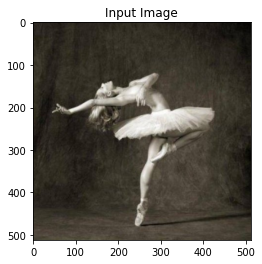

In [56]:
input_img = content_img.clone()

# 그림에 원본 입력 이미지를 추가합니다.
plt.figure()
imshow(input_img, title='Input Image')

In [57]:
def get_input_optimizer(input_img):
    # 입력이 기울기가 필요한 매개 변수임을 표시하는 줄
    optimizer = optim.LBFGS([input_img])
    return optimizer

In [60]:
def run_style_transfer(cnn, normalization_mean, normalization_std,
                       content_img, style_img, input_img, num_steps=300,
                       style_weight=10000, content_weight=1):
    """Run the style transfer."""
    print('Building the style transfer model..')
    model, style_losses, content_losses = get_style_model_and_losses(cnn,
        normalization_mean, normalization_std, style_img, content_img)

    # 모델의 매개변수를 제외한 입력을 최적화해야 하므로
    # 이에 맞춰서 requires_grad 값을 갱신합니다.
    input_img.requires_grad_(True)
    model.requires_grad_(False)

    optimizer = get_input_optimizer(input_img)

    print('Optimizing..')
    run = [0]
    while run[0] <= num_steps:

        def closure():
            # 업데이트 된 입력 이미지의 값을 수정
            with torch.no_grad():
                input_img.clamp_(0, 1)

            optimizer.zero_grad()
            model(input_img)
            style_score = 0
            content_score = 0

            for sl in style_losses:
                style_score += sl.loss
            for cl in content_losses:
                content_score += cl.loss

            style_score *= style_weight
            content_score *= content_weight

            loss = style_score + content_score
            loss.backward()

            run[0] += 1
            if run[0] % 50 == 0:
                print("run {}:".format(run))
                print('Style Loss : {:4f} Content Loss: {:4f}'.format(
                    style_score.item(), content_score.item()))
                print()

            return style_score + content_score

        optimizer.step(closure)

    # 마지막 수정...
    with torch.no_grad():
        input_img.clamp_(0, 1)

    return input_img

In [63]:
import numpy as np
import io
import requests
from PIL import Image

def read_data(img_num, txt, idx):
    f = open(txt, 'r')
    IMG_URLs = []
    for i in range(img_num):
        line = f.readline()
        url = line.split()[idx]
        IMG_URLs = np.append(IMG_URLs,url)
    f.close()
    return IMG_URLs

def get_img(num, IMG_URL, root):
    response = requests.get(IMG_URL)
    img_pil = Image.open(io.BytesIO(response.content))
    #img_pil.save(str(idx) + '.jpg')
    img_pil.save(root + str(num) + '.jpg')
    return img_pil


In [105]:
import torch, os
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


# functions
CAM             = 1
USE_CUDA        = 1
RESUME          = 0
PRETRAINED      = 0


# hyperparameters
BATCH_SIZE      = 32
IMG_SIZE        = 224
LEARNING_RATE   = 0.01
EPOCH           = 2

In [106]:
# prepare data
normalize = transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
)

transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    normalize
])

transform_test = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize
])

In [107]:
import torchvision

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

# class
classes = {0: 'plane', 1: 'car', 2: 'bird', 3: 'cat',
           4: 'deer', 5: 'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}


Files already downloaded and verified
Files already downloaded and verified


In [110]:
# fine tuning
if PRETRAINED:
    net = inception_v3(pretrained=PRETRAINED)
    for param in net.parameters():
        param.requires_grad = False
    net.fc = torch.nn.Linear(2048, 10)
else:
    net = inception_v3(pretrained=PRETRAINED, num_classes=len(classes))
final_conv = 'Mixed_7c'

net = net.cuda()

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [116]:
from torch.autograd import Variable

def retrain(trainloader, model, use_cuda, epoch, criterion, optimizer):
    model.train()
    correct, total = 0, 0
    acc_sum, loss_sum = 0, 0
    i = 0
    for batch_idx, (data, target) in enumerate(trainloader):
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)

        # calculate accuracy
        correct += (torch.max(output, 1)[1].view(target.size()).data == target.data).sum()
        total += trainloader.batch_size
        train_acc = 100. * correct / total
        acc_sum += train_acc
        i += 1

        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        loss_sum += loss.item()

        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.3f}\tTraining Accuracy: {:.3f}%'.format(
                epoch, batch_idx * len(data), len(trainloader.dataset),
                100. * batch_idx / len(trainloader), loss.item(), train_acc))

    acc_avg = acc_sum / i
    loss_avg = loss_sum / len(trainloader.dataset)
    print()
    print('Train Epoch: {}\tAverage Loss: {:.3f}\tAverage Accuracy: {:.3f}%'.format(epoch, loss_avg, acc_avg))


def retest(testloader, model, use_cuda, criterion, epoch, RESUME):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in testloader:
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        # sum up batch loss
        test_loss += criterion(output, target).item()
        # get the index of the max log-probability
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(testloader.dataset)
    test_acc = 100. * correct / len(testloader.dataset)
    result = '\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.3f}%)\n'.format(
        test_loss, correct, len(testloader.dataset), test_acc)
    print(result)

    # Save checkpoint.
    if epoch % 10 == 0:
        torch.save(model.state_dict(), 'checkpoint/' + str(RESUME + int(epoch / 10)) + '.pt')


In [117]:

# load checkpoint
if RESUME != 0:
    print("===> Resuming from checkpoint.")
    assert os.path.isfile('checkpoint/'+ str(RESUME) + '.pt'), 'Error: no checkpoint found!'
    net.load_state_dict(torch.load('checkpoint/' + str(RESUME) + '.pt'))


# retrain
criterion = torch.nn.CrossEntropyLoss()

if PRETRAINED:
    optimizer = torch.optim.SGD(net.fc.parameters(), lr=LEARNING_RATE, momentum=0.9, weight_decay=5e-4)
else:
    optimizer = torch.optim.SGD(net.parameters(), lr=LEARNING_RATE, momentum=0.9, weight_decay=5e-4)

for epoch in range (1, EPOCH + 1):
    retrain(trainloader, net, USE_CUDA, epoch, criterion, optimizer)
    retest(testloader, net, USE_CUDA, criterion, 1, RESUME)

<ipython-input-116-71539c95501d>:46: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)



Test set: Average loss: 0.0465, Accuracy: 4710/10000 (47.100%)



In [118]:
# hook the feature extractor
features_blobs = []

def hook_feature(module, input, output):
    features_blobs.append(output.data.cpu().numpy())

net._modules.get(final_conv).register_forward_hook(hook_feature)


# CAM
if CAM:
    root = '/content/drive/MyDrive/CAU_mAI/cat.jpg'
    img = Image.open(root)
    # get_cam(net, features_blobs, img, classes, root)

In [119]:
params = list(net.parameters())
weight_softmax = np.squeeze(params[-2].data.cpu().numpy())

normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    normalize
])

img_tensor = preprocess(img)
img_variable = Variable(img_tensor.unsqueeze(0)).cuda()
logit = net(img_variable)

In [121]:
h_x = F.softmax(logit, dim=1).data.squeeze()
probs, idx = h_x.sort(0, True)

# output: the prediction
for i in range(0, 2):
    line = '{:.3f} -> {}'.format(probs[i], classes[idx[i].item()])
    print(line)

0.307 -> frog
0.165 -> cat


In [124]:
import cv2
# generate class activation mapping for the top1 prediction
def returnCAM(feature_conv, weight_softmax, class_idx):
    # generate the class activation maps upsample to 256x256
    size_upsample = (256, 256)
    bz, nc, h, w = feature_conv.shape
    output_cam = []
    for idx in class_idx:
        cam = weight_softmax[class_idx].dot(feature_conv.reshape((nc, h*w)))
        cam = cam.reshape(h, w)
        cam = cam - np.min(cam)
        cam_img = cam / np.max(cam)
        cam_img = np.uint8(255 * cam_img)
        output_cam.append(cv2.resize(cam_img, size_upsample))
    return output_cam

In [125]:
CAMs = returnCAM(features_blobs[0], weight_softmax, [idx[0].item()])

In [129]:
print('output CAM.jpg for the top1 prediction: %s' % classes[idx[0].item()])
img = cv2.imread(root)
height, width, _ = img.shape
CAM = cv2.resize(CAMs[0], (width, height))
heatmap = cv2.applyColorMap(CAM, cv2.COLORMAP_JET)
result = heatmap * 0.5 + img * 0.5
# cv2.imwrite('cam.jpg', result)

output CAM.jpg for the top1 prediction: frog


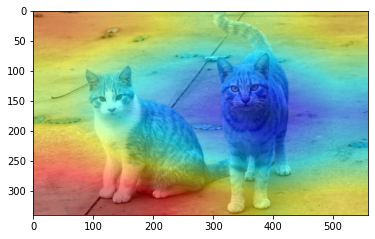

In [132]:
plt.imshow(result/255)